# 1 Подготовка

## 1.1 Загрузка библиотек и датасетов

In [57]:
#Библиотека с github для оценки фичей (установка)

!pip install git+https://github.com/WillKoehrsen/feature-selector.git

  Cloning https://github.com/WillKoehrsen/feature-selector.git to /tmp/pip-req-build-6o9iorzs
  Running command git clone -q https://github.com/WillKoehrsen/feature-selector.git /tmp/pip-req-build-6o9iorzs


In [58]:
#Библиотека с github для оценки фичей (импорт)
from feature_selector import FeatureSelector

#Остальные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [60]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

## 1.2 Делим train датасет на X и y

In [61]:
y = df_train['SalePrice']
X = df_train.drop('SalePrice', axis=1)

## 1.3 Feature Select

In [62]:
fs = FeatureSelector(data=X, labels=y)

36 features with a correlation magnitude greater than 0.00.



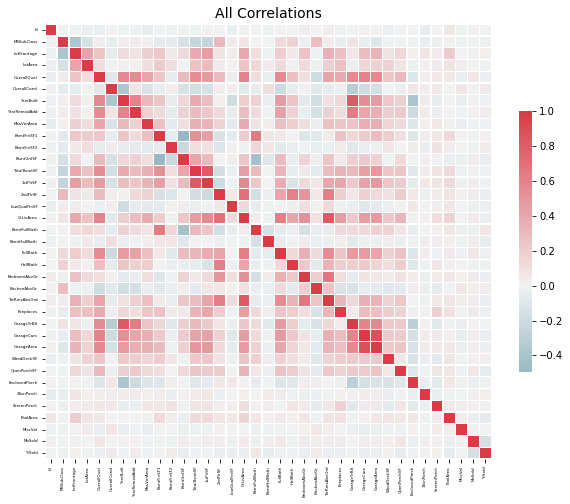

In [63]:
#Корреляция всех признаков
fs.identify_collinear(correlation_threshold=0)

fs.plot_collinear(plot_all=True)

9 features with a correlation magnitude greater than 0.60.



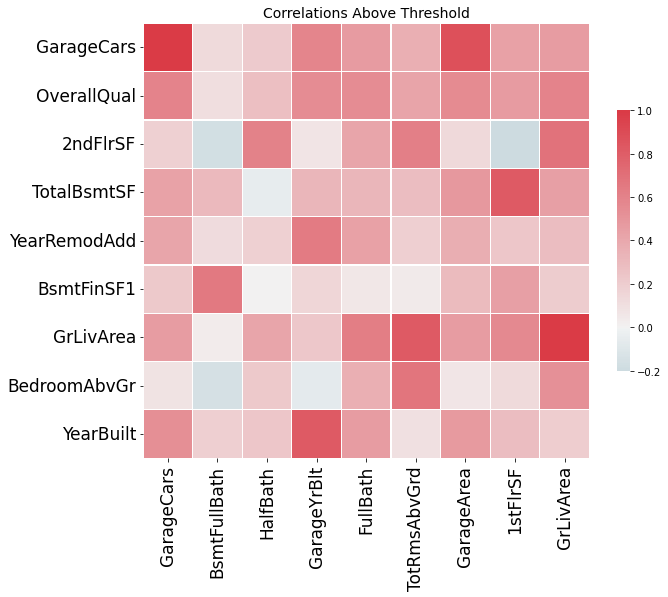

In [64]:
#Корреляция признаков с порогом 60%

fs.identify_collinear(correlation_threshold=0.6)

fs.plot_collinear()

In [65]:
#Корреляция признаков с порогом 80%

fs.identify_collinear(correlation_threshold=0.8)

#Запишем в список для удаления
collinear_features = fs.ops['collinear']

#Датасет коррелирующих признаков
fs.record_collinear.head()

4 features with a correlation magnitude greater than 0.80.



,drop_feature,corr_feature,corr_value
0,1stFlrSF,TotalBsmtSF,0.819530
1,TotRmsAbvGrd,GrLivArea,0.825489
2,GarageYrBlt,YearBuilt,0.825667
3,GarageArea,GarageCars,0.882475


In [66]:
#Таким образом удалим все неинформативные и коррелирующие между собой признаки

X = X.drop(collinear_features, axis=1)
X_test = X_test.drop(collinear_features, axis=1)

In [67]:
X.shape, X_test.shape

((1460, 76), (1459, 76))

# 2 Анализ и обработка

## 2.1 Пропущенные значения

In [68]:
pd.concat([X.isnull().sum().sort_values(ascending=False).rename('Train'), X_test.isnull().sum().sort_values(ascending=False).rename('Test')], axis=1).head(15)

,Train,Test
PoolQC,1453,1456
MiscFeature,1406,1408
Alley,1369,1352
Fence,1179,1169
FireplaceQu,690,730
LotFrontage,259,227
GarageCond,81,78
GarageType,81,76
GarageFinish,81,78
GarageQual,81,78


## 2.2 Визуализируем признаки

In [69]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [101]:
#Отделим цифровый, не цифровый и даты

columns_obj = X.select_dtypes('object').columns
columns_nums = X.select_dtypes(exclude='object')

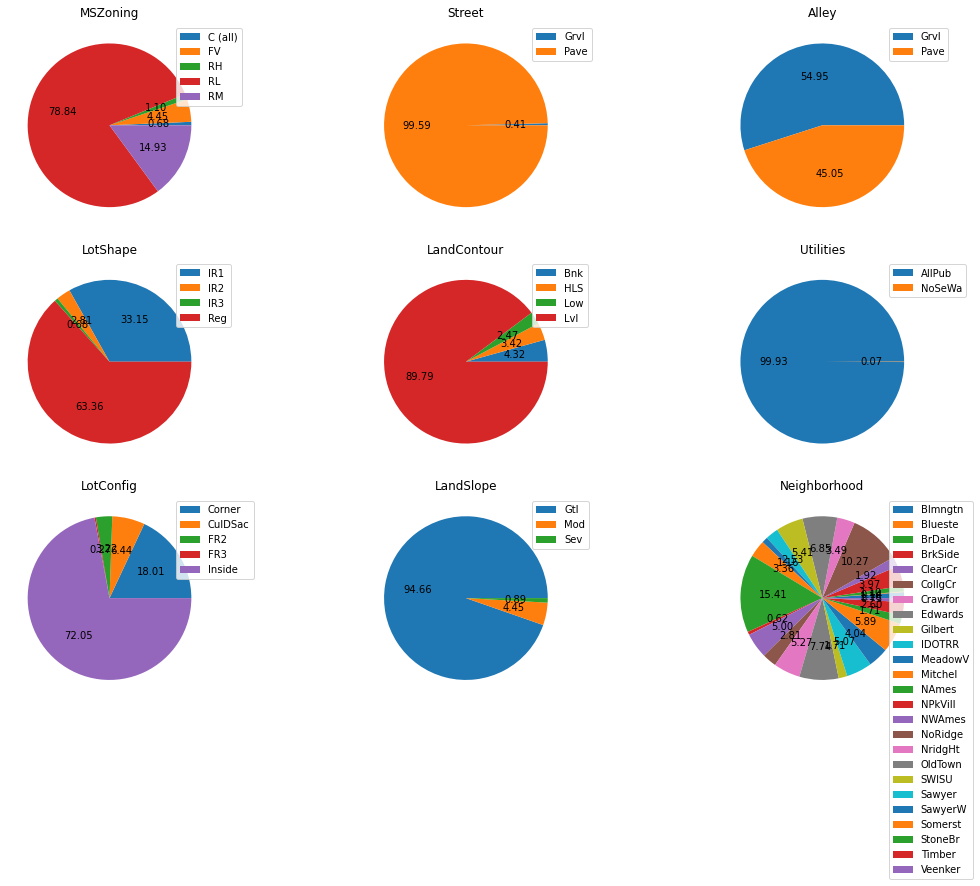

In [94]:
#Частотное распределение
columns_obj1 = columns_obj.columns[:9]

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
plt.tight_layout() 

for i in range(3):
  for j in range(3):
    axs[i][j].pie(X.groupby(columns_obj1[i*3+j]).count()['Id'], autopct='%.2f')
    axs[i][j].legend(labels=X.groupby(columns_obj1[i*3+j]).count().index, loc='upper left', bbox_to_anchor=(0.8, 1))
    axs[i][j].set_title(columns_obj1[i*3+j])

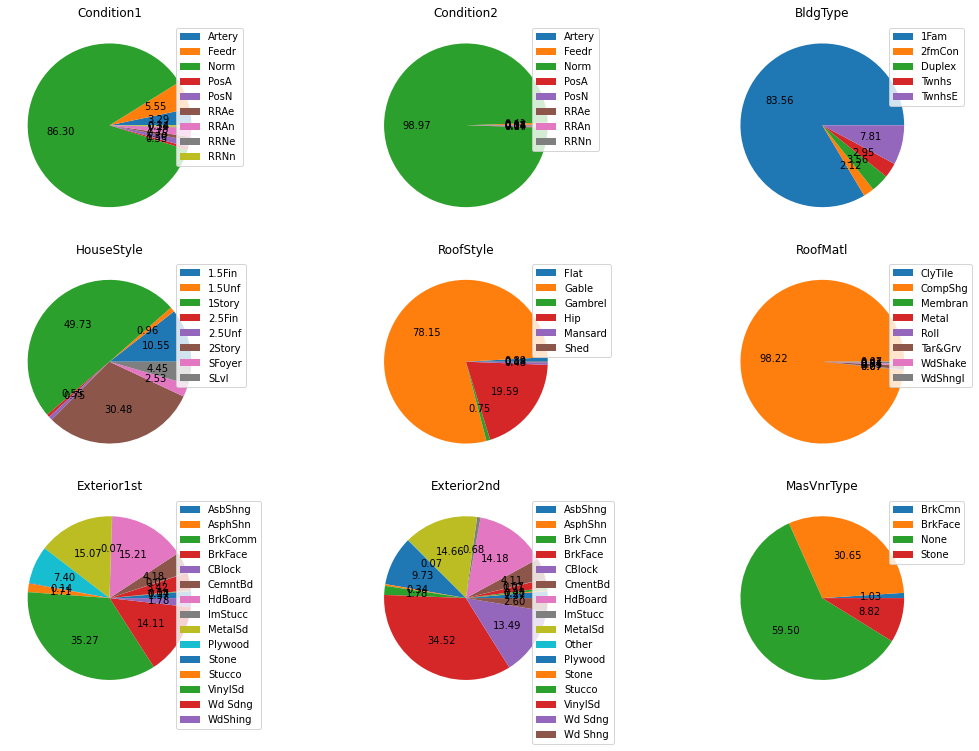

In [95]:
#Частотное распределение
columns_obj2 = columns_obj.columns[9:18]

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
plt.tight_layout() 

for i in range(3):
  for j in range(3):
    axs[i][j].pie(X.groupby(columns_obj2[i*3+j]).count()['Id'], autopct='%.2f')
    axs[i][j].legend(labels=X.groupby(columns_obj2[i*3+j]).count().index, loc='upper left', bbox_to_anchor=(0.8, 1))
    axs[i][j].set_title(columns_obj2[i*3+j])

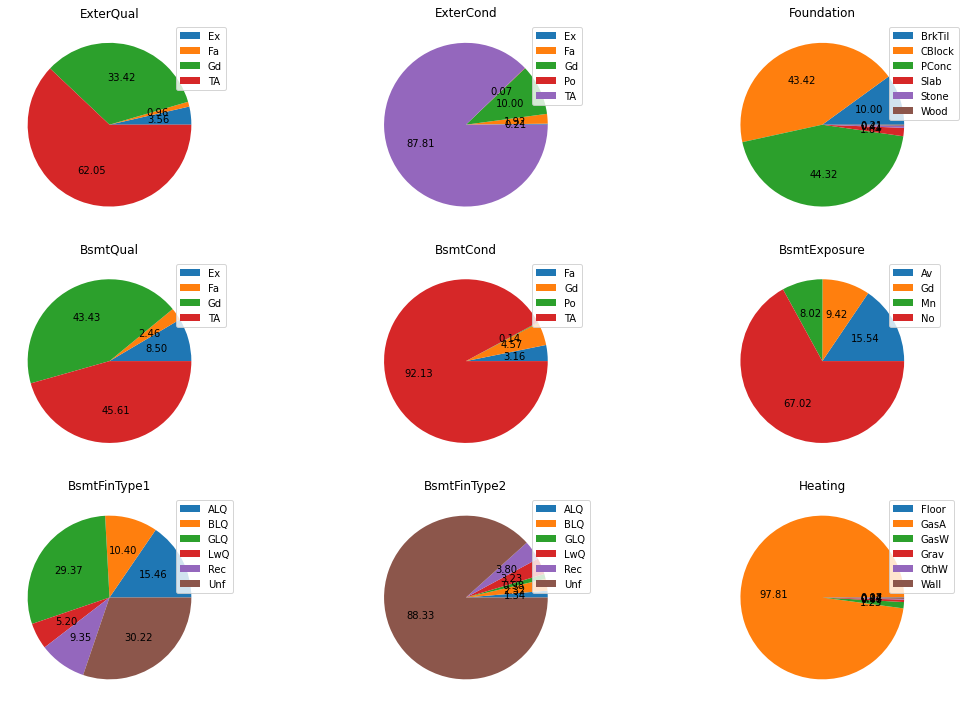

In [96]:
#Частотное распределение
columns_obj3 = columns_obj.columns[18:27]

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
plt.tight_layout() 

for i in range(3):
  for j in range(3):
    axs[i][j].pie(X.groupby(columns_obj3[i*3+j]).count()['Id'], autopct='%.2f')
    axs[i][j].legend(labels=X.groupby(columns_obj3[i*3+j]).count().index, loc='upper left', bbox_to_anchor=(0.8, 1))
    axs[i][j].set_title(columns_obj3[i*3+j])

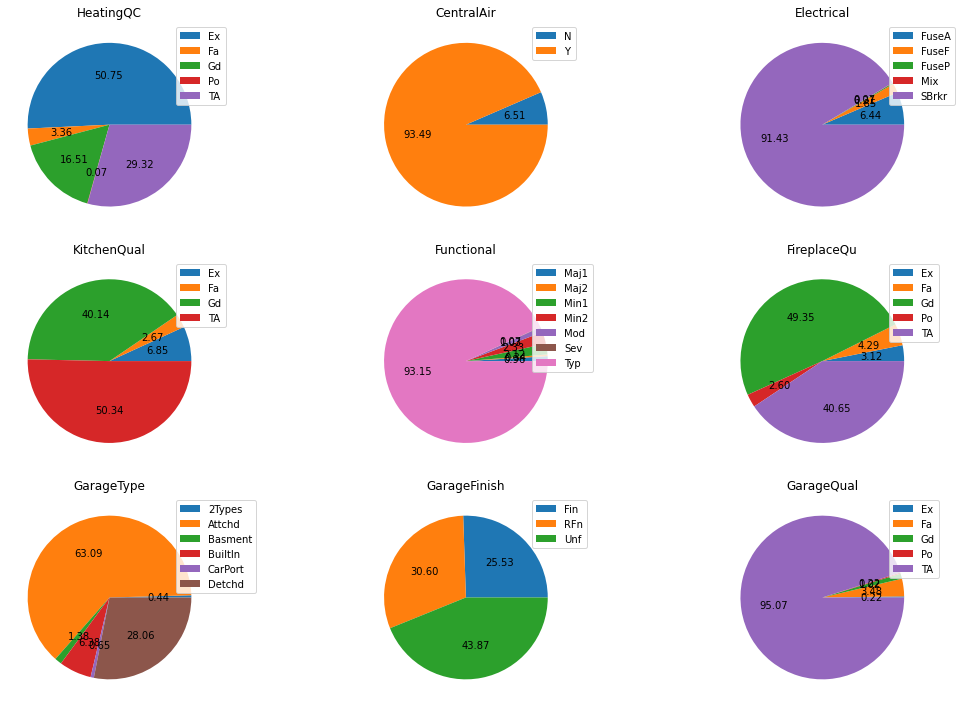

In [97]:
#Частотное распределение
columns_obj4 = columns_obj.columns[27:36]

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 10))
plt.tight_layout() 

for i in range(3):
  for j in range(3):
    axs[i][j].pie(X.groupby(columns_obj4[i*3+j]).count()['Id'], autopct='%.2f')
    axs[i][j].legend(labels=X.groupby(columns_obj4[i*3+j]).count().index, loc='upper left', bbox_to_anchor=(0.8, 1))
    axs[i][j].set_title(columns_obj4[i*3+j])

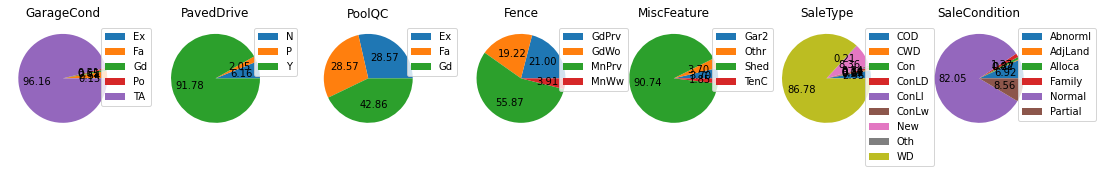

In [99]:
#Частотное распределение
columns_obj5 = columns_obj.columns[36:43]

fig, axs = plt.subplots(ncols=7, nrows=1, figsize=(15, 10))
plt.tight_layout() 

for i in range(7):
    axs[i].pie(X.groupby(columns_obj5[i]).count()['Id'], autopct='%.2f')
    axs[i].legend(labels=X.groupby(columns_obj5[i]).count().index, loc='upper left', bbox_to_anchor=(0.8, 1))
    axs[i].set_title(columns_obj5[i])

## 2.3 Переведём в объекты в цифровые значения

In [102]:
#Создадим словари значений

for i in range(len(columns_obj)):
  values_list = pd.unique(X[columns_obj[i]])

  if i<4:
    locals()[columns_obj[i] + str('_dict')] = {j:i for i, j in enumerate(values_list[1:])}
    locals()[columns_obj[i] + str('_dict')][values_list[0]] = len(values_list)-1
  else:
    locals()[columns_obj[i] + str('_dict')] = {j:i for i, j in enumerate(values_list[:])}

In [103]:
columns_obj

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [108]:
# Заменим не цифровые значения
for i in range(len(columns_obj)):
  X[columns_obj[i]] = X[columns_obj[i]].map(locals()[columns_obj[i] + str('_dict')])

for i in range(len(columns_obj)):
  X_test[columns_obj[i]] = X_test[columns_obj[i]].map(locals()[columns_obj[i] + str('_dict')])

In [109]:
#Посмотрим на корреляцию не цифровых признаков с целевым признаком

X[columns_obj].corrwith(y).sort_values(ascending=False).to_frame().style.bar(align='zero', vmax=1)

,0
FireplaceQu,0.402854
MSZoning,0.279852
RoofStyle,0.159332
SaleCondition,0.142503
Alley,0.139868
BsmtExposure,0.132027
LotConfig,0.109106
LandContour,0.092009
SaleType,0.072896
PoolQC,0.051364


In [111]:
pd.concat([X.isnull().sum().sort_values(ascending=False).rename('Train'), X_test.isnull().sum().sort_values(ascending=False).rename('Test')], axis=1).head(15)


,Train,Test
LotFrontage,259,227
MasVnrArea,8,15
SaleCondition,0,0
ExterCond,0,0
RoofStyle,0,0
RoofMatl,0,0
Exterior1st,0,1
Exterior2nd,0,1
MasVnrType,0,0
ExterQual,0,0


## 2.4 Уберем пропущенные значения

In [112]:
pd.concat([X.isnull().sum().sort_values(ascending=False).rename('Train'), X_test.isnull().sum().sort_values(ascending=False).rename('Test')], axis=1).head(15)


,Train,Test
LotFrontage,259,227
MasVnrArea,8,15
SaleCondition,0,0
ExterCond,0,0
RoofStyle,0,0
RoofMatl,0,0
Exterior1st,0,1
Exterior2nd,0,1
MasVnrType,0,0
ExterQual,0,0


In [113]:
X['LotFrontage'] = X['LotFrontage'].fillna(X['LotFrontage'].mean())

In [114]:
X['MasVnrArea'] = X['MasVnrArea'].fillna(X['MasVnrArea'].mean())

In [115]:
X = X.fillna(0)

In [116]:
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(X_test['LotFrontage'].mean())
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(X_test['MasVnrArea'].mean())
X_test = X_test.fillna(0)

# 3 Строим модели

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score

from sklearn.metrics import mean_squared_log_error


import warnings

In [122]:
random_state = 7

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [147]:
#Для кросс-валидации
skf = StratifiedKFold(n_splits=5, random_state=random_state, shuffle=True)

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
#Создадим функцию для нахождения наилучших параметров
def best_params(reg, parametrs, X, y, cv):
  grid = GridSearchCV(reg, parametrs, cv=cv, scoring='roc_auc')
  grid = grid.fit(X, y)
  return grid.best_params_

### 3.1 Random Forest

In [191]:
rfc_best_parametrs = {'max_depth': 50, 
                      'max_features': 'log2', 
                      'n_estimators': 300}

In [157]:
# rfc_parametrs = {'max_features': ['log2', 'sqrt'], 
#                  'max_depth': [10, 15, 20, 25], 
#                  'n_estimators': range(200, 300, 10)}

In [ ]:
# rfc_best_parametrs = best_params(RandomForestRegressor(), rfc_parametrs, x_train, y_train, skf)

In [149]:
# #Посмотрим какие параметры оказались наилучшими

# print('Random Forest best parametrs\n', '-'*20, '\n', rfc_best_parametrs, '\n')

Random Forest best parametrs
 -------------------- 
 {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200} 



In [192]:
rfc = RandomForestRegressor(**rfc_best_parametrs, random_state=random_state)

In [193]:
rfc_model = rfc.fit(x_train, y_train)
rfc_pred = rfc_model.predict(x_test)

In [194]:
MSEL = mean_squared_log_error(y_test, rfc_pred)
MSEL

0.023135582443141938

In [195]:
y_pred = rfc_model.predict(X_test)

In [196]:
HouseIds = X_test['Id']

In [197]:
output = pd.DataFrame({"Id": HouseIds, "SalePrice": y_pred})
output.head(10)

,Id,SalePrice
0,1461,126124.416667
1,1462,153474.416667
2,1463,186097.706667
3,1464,194623.820000
4,1465,193054.816667
5,1466,186485.166667
6,1467,178933.613333
7,1468,175889.396667
8,1469,187095.986667
9,1470,127754.733333


In [199]:
output.to_csv('submission.csv', index=False)